# Predicting the number of orders for upcoming 10 weeks
#By- Aarush Kumar
#Dated: September 10,2021

In [1]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('/home/aarush100616/Downloads/Projects/Food Demand Forecasting/train.csv')
test = pd.read_csv('/home/aarush100616/Downloads/Projects/Food Demand Forecasting/test.csv')
meal = pd.read_csv('/home/aarush100616/Downloads/Projects/Food Demand Forecasting/meal_info.csv')
centerinfo = pd.read_csv('/home/aarush100616/Downloads/Projects/Food Demand Forecasting/fulfilment_center_info.csv')

In [3]:
train.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders  
0                      0                  0         177  
1                      0                  0         270  
2                      0                  0         189  
3                      0                  0          54  
4                      0                  0          40

In [4]:
centerinfo.head()

center_id  city_code  region_code center_type  op_area
0         11        679           56      TYPE_A      3.7
1         13        590           56      TYPE_B      6.7
2        124        590           56      TYPE_C      4.0
3         66        648           34      TYPE_A      4.1
4         94        632           34      TYPE_C      3.6

In [5]:
meal.head()

meal_id   category cuisine
0     1885  Beverages    Thai
1     1993  Beverages    Thai
2     2539  Beverages    Thai
3     1248  Beverages  Indian
4     2631  Beverages  Indian

In [6]:
train.describe()

id           week      center_id        meal_id  \
count  4.565480e+05  456548.000000  456548.000000  456548.000000   
mean   1.250096e+06      74.768771      82.105796    2024.337458   
std    1.443548e+05      41.524956      45.975046     547.420920   
min    1.000000e+06       1.000000      10.000000    1062.000000   
25%    1.124999e+06      39.000000      43.000000    1558.000000   
50%    1.250184e+06      76.000000      76.000000    1993.000000   
75%    1.375140e+06     111.000000     110.000000    2539.000000   
max    1.499999e+06     145.000000     186.000000    2956.000000   

       checkout_price     base_price  emailer_for_promotion  \
count   456548.000000  456548.000000          456548.000000   
mean       332.238933     354.156627               0.081152   
std        152.939723     160.715914               0.273069   
min          2.970000      55.350000               0.000000   
25%        228.950000     243.500000               0.000000   
50%        296.820000     310.460000               0.000000   
75%        445.230000     458.870000               0.000000   
max        866.270000     866.270000               1.000000   

       homepage_featured     num_orders  
count       456548.00000  456548.000000  
mean             0.10920     261.872760  
std              0.31189     395.922798  
min              0.00000      13.000000  
25%              0.00000      54.000000  
50%              0.00000     136.000000  
75%              0.00000     324.000000  
max              1.00000   24299.000000

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [8]:
train_cat = train[['center_id','meal_id','emailer_for_promotion','homepage_featured']]
train_num = train[['week','checkout_price']]

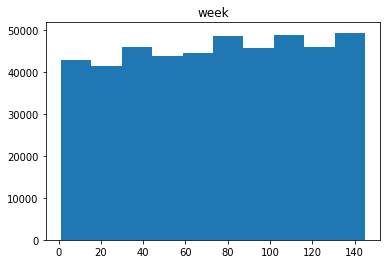

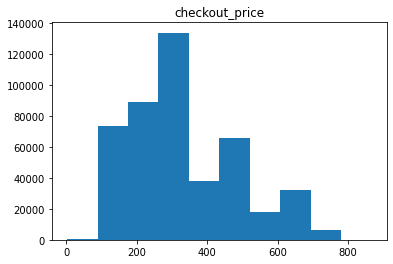

In [9]:
for i in train_num.columns:
    plt.hist(train_num[i])
    plt.title(i)
    plt.show()

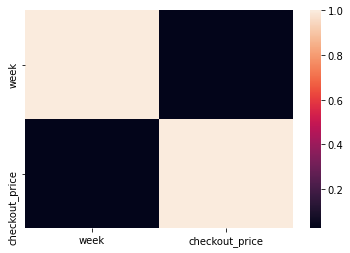

In [10]:
sns.heatmap(train_num.corr())

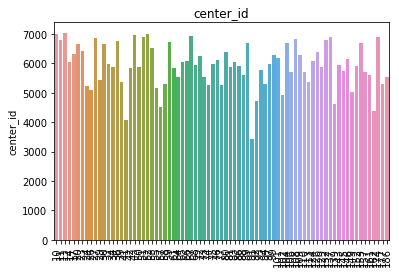

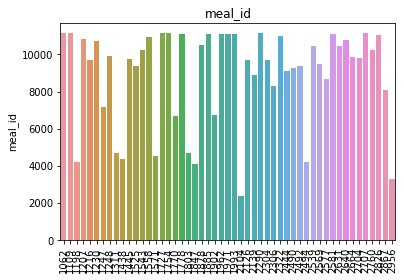

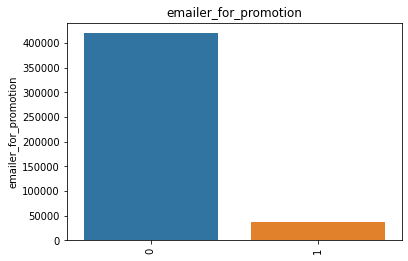

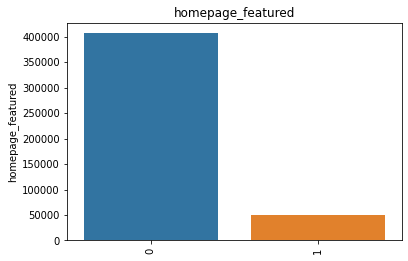

In [11]:
for i in train_cat.columns:
    plt.xticks(rotation=90)
    sns.barplot(train_cat[i].value_counts().index,train_cat[i].value_counts()).set_title(i)
    plt.show()

## Data Normalization

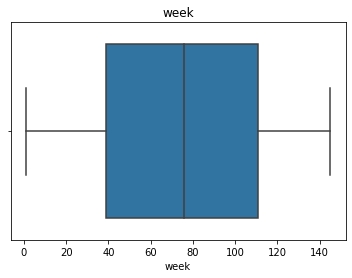

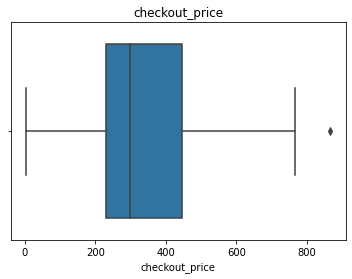

In [12]:
for i in train_num.columns:
    sns.boxplot(train_num[i])
    plt.title(i)
    plt.show()

In [13]:
def outlinefree(dataCol):     
      
    sorted(dataCol)                          # sort column
    Q1,Q3 = np.percentile(dataCol,[25,75])   # getting 25% and 75% percentile
    IQR = Q3-Q1                              # getting IQR 
    LowerRange = Q1-(1.5 * IQR)              # getting Lowrange
    UpperRange = Q3+(1.5 * IQR)              # getting Upperrange 
    
    colname = dataCol.tolist()                 
    newlist =[]                              
    for i in range(len(colname)):
        
        if colname[i] > UpperRange:           
            colname[i] = UpperRange          
            newlist.append(colname[i])       
        elif colname[i] < LowerRange:         
            colname[i] = LowerRange          
            newlist.append(colname[i])       # append value to empty list 
        else:
            colname[i]                       
            newlist.append(colname[i])       
    return newlist


In [14]:
for i in range(len(train_num.columns)):
    new_list =  outlinefree(train.loc[:,train_num.columns[i]]) # retrun new list
    train.loc[:,train_num.columns[i]] = new_list 

In [15]:
def center_id(datacol):
    center_id_val_index_n = []
    for i in datacol:
        if i >= 10 and i <= 30:
            center_id_val_index_n.append("10-30")
        elif i >= 31 and i <=50:
            center_id_val_index_n.append("31-50")
        elif i >= 51 and i <=70:
            center_id_val_index_n.append("51-70")  
        elif i >= 71 and i <=90:
            center_id_val_index_n.append("71-90")
        elif i >= 91 and i <=110:
            center_id_val_index_n.append("91-110") 
        elif i >= 111 and i <=130:
            center_id_val_index_n.append("111-130")
        elif i >= 131 and i <=150:
            center_id_val_index_n.append("131-150")          
        else:
            center_id_val_index_n.append("151-190")
    
    return  center_id_val_index_n 
center_id_val_index_n = center_id(train.center_id) 
train.center_id = center_id_val_index_n

In [16]:
def meal_id(datacol):        
    meal_id_val_index_n = []
    for i in datacol:
        if i >= 1000 and i <= 1300:
            meal_id_val_index_n.append("1000-1300")
        elif i >= 1301 and i <=1600:
            meal_id_val_index_n.append("1301-1600")
        elif i >= 1601 and i <=1900:
            meal_id_val_index_n.append("1601-1900")  
        elif i >= 1901 and i <=2200:
            meal_id_val_index_n.append("1901-2200")
        elif i >= 2201 and i <=2500:
            meal_id_val_index_n.append("2201-2500") 
        elif i >= 2501 and i <=2800:
            meal_id_val_index_n.append("2501-2800")          
        else:
            meal_id_val_index_n.append("2801-3000") 
    return  meal_id_val_index_n

meal_id_val_index_n = meal_id(train.meal_id)
train.meal_id = meal_id_val_index_n

## Feature Selection

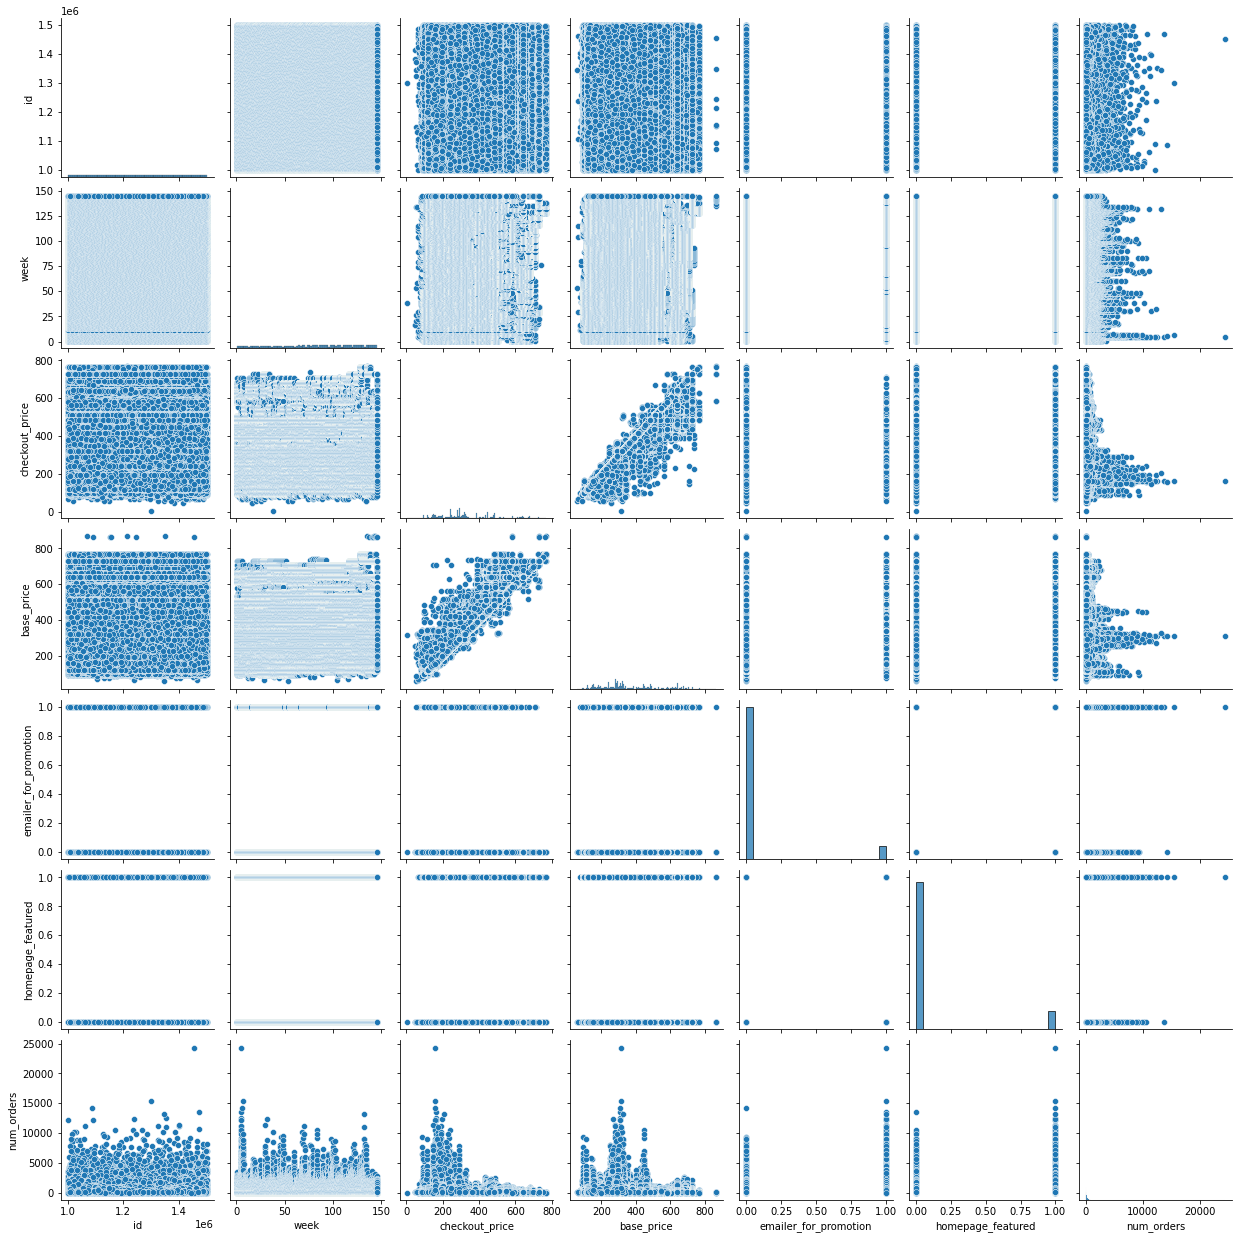

In [17]:
sns.pairplot(train)

In [18]:
f_train = train.loc[:,['num_orders','week','center_id','meal_id','checkout_price','base_price','emailer_for_promotion',
                 'homepage_featured']]
final_train = pd.get_dummies(f_train)

In [19]:
features = final_train.iloc[:,1:].values
label = final_train.iloc[:,:1].values

## Model Buliding

In [20]:
X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.20,random_state=1705)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [21]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred)))

R2 score  : 0.22430653751828467
MSE score  : 111857.88773504822
RMSE:  334.45162241353864


In [22]:
X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.20,random_state=1956)
DTRmodel = DecisionTreeRegressor(max_depth=3,random_state=0)
DTRmodel.fit(X_train,y_train)
y_pred = DTRmodel.predict(X_test)

In [23]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred)))

R2 score  : 0.2615191471545507
MSE score  : 110773.22350524069
RMSE:  332.8261160204239


In [24]:
X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.20,random_state=33)
RFRmodel = RandomForestRegressor(max_depth=3, random_state=0)
RFRmodel.fit(X_train,y_train)
y_pred = RFRmodel.predict(X_test)

In [25]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred)))

R2 score  : 0.2596071920579188
MSE score  : 109570.40278549175
RMSE:  331.0142032987282


In [26]:
center_id_val_index_n = center_id(test.center_id) 
test.center_id = center_id_val_index_n

meal_id_val_index_n = meal_id(test.meal_id)
test.meal_id = meal_id_val_index_n

In [27]:
f_test = test.loc[:,['week','center_id','meal_id','checkout_price','base_price','emailer_for_promotion',
                 'homepage_featured']]
final_test = pd.get_dummies(f_test)

In [28]:
test_predict = RFRmodel.predict(final_test)

In [29]:
test['num_orders'] = test_predict

In [30]:
sample =  test.loc[:,['id','num_orders']]

In [31]:
sample.to_csv('/home/aarush100616/Downloads/Projects/Food Demand Forecasting/sample_submission.csv',index=False)